# Day 17 — Model Evaluation & Validation
### 100 Days of AI/ML Challenge
**Focus:** Understanding model evaluation, validation, and performance metrics.

Model evaluation is critical to ensure that a model not only fits the training data but also generalizes well to unseen data. Today, we'll explore metrics, cross-validation, and diagnostic tools to analyze performance, bias, and variance.

##  1. Import Libraries and Load Data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

Training samples: 455, Test samples: 114


## 2. Data Preprocessing & Baseline Model

In [2]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 🔍 3. Cross-Validation for Reliable Performance

In [3]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy Scores: [0.95604396 0.98901099 0.97802198 0.97802198 0.98901099]
Mean CV Accuracy: 0.9780


## 4. Model Comparison — Random Forest & XGBoost

In [7]:
from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(
    eval_metric='logloss',  # still needed for binary classification
    random_state=42
)

models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.9737
Random Forest Accuracy: 0.9649
XGBoost Accuracy: 0.9561


## 5. ROC Curve & Precision-Recall Curve

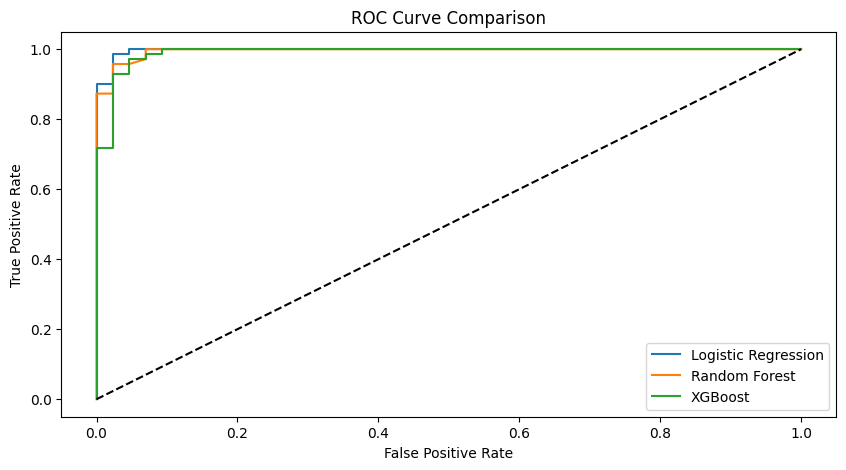

In [5]:
plt.figure(figsize=(10,5))
for name, model in models.items():
    y_score = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name}")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## 6. Learning Curves — Bias-Variance Analysis

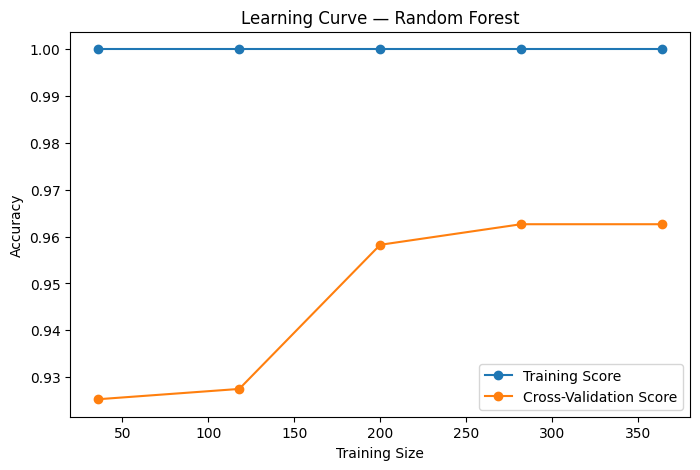

In [6]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), X_train_scaled, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 5))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', label='Cross-Validation Score')
plt.title('Learning Curve — Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 7. Key Insights
- Evaluation metrics should align with business goals — not all accuracy gains are meaningful.
- Cross-validation provides a robust estimate of generalization.
- Learning curves reveal whether more data or tuning can help.
- ROC and PR curves highlight trade-offs between sensitivity and precision.
